In [1]:
#!conda install -c intel scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets_labeled.csv', sep = ',')

In [6]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [7]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    5612
0.0     270
1.0     154
Name: sentiment, dtype: int64

In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.929755
0.0    0.044732
1.0    0.025514
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(424, 2)

In [11]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_nolabeled_df.shape

(5612, 2)

### Splitting train and test datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [14]:
X_train.shape

(339,)

In [15]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.637168
1.0    0.362832
Name: sentiment, dtype: float64

In [16]:
X_test.shape

(85,)

In [17]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.635294
1.0    0.364706
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [18]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [19]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
X_bow = bow.fit_transform(X_train)

In [21]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [22]:
logistic_model = LogisticRegression(random_state = 2)

In [23]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [24]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

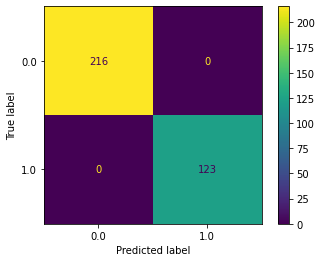

In [25]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

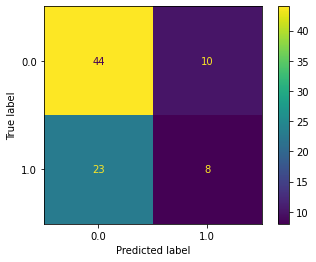

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [27]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


### Training and evaluating a model using TF-IDF

In [28]:
logistic_model = LogisticRegression(random_state = 2)

In [29]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [30]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

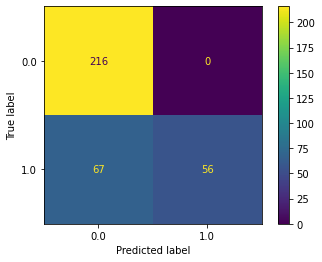

In [31]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

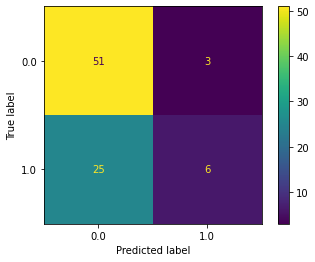

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [33]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.6666666666666666
Recall: 0.1935483870967742
F1: 0.30000000000000004


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

# Workshop 3
### Deadline: November 21th, 2021

Analyze how you can improve the current models. Evaluate these alternatives:
- It is needed more training data
- There is some mislabeled data
- Logistic regression-based models are inadequate to represent this scenario. Try with different algorithms: [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [K-Nearest Neighborhoods](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Naive-Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [Neural Networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).
- Previous results can be improved? Which model is better and why?

## Evaluating the model with the initial sample:

Precision: 1.0
Recall: 1.0
F1: 1.0


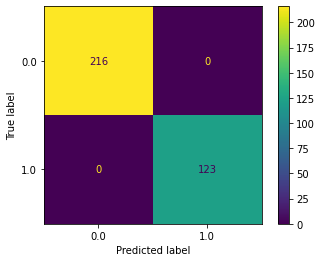

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
LogisticRegression(random_state=2)
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


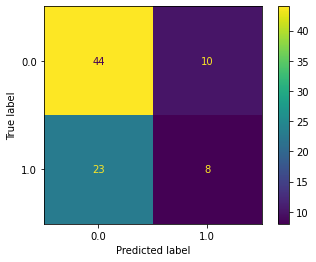

In [35]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 1.

#### Selecting a sample with more data:

In [36]:
dfSample= tweets_labeled_df#.sample(frac= 0.4)
print(dfSample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 6035
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_text  424 non-null    object 
 1   sentiment  424 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB
None


#### Split dataset:

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)

#### Using BOW and training the model: 

In [38]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
LogisticRegression(random_state=2)

LogisticRegression(random_state=2)

#### Evaluating model:

Precision: 1.0
Recall: 1.0
F1: 1.0


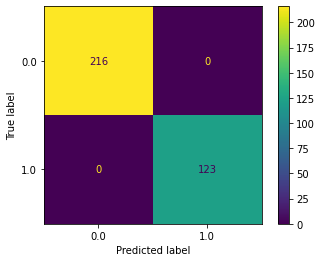

In [39]:
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


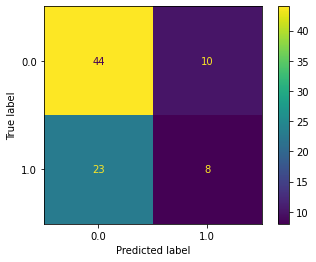

In [40]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 2.

#### Evaluating the model with some corrections to labeled:

Precision: 1.0
Recall: 1.0
F1: 1.0


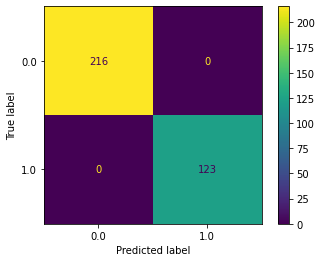

In [41]:
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


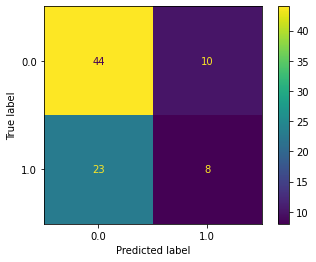

In [42]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 3.

In [48]:
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)
xTrainBow= bow.transform(xTrain)
xTestBow= bow.transform(xTest)

#### Decisions Trees (depth 3):

Precision: 1.0
Recall: 0.04065040650406504
F1: 0.078125


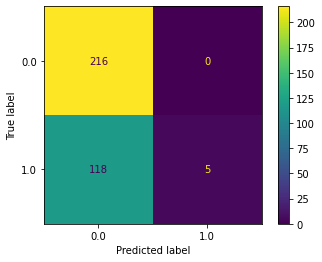

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier(max_depth= 3)

dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


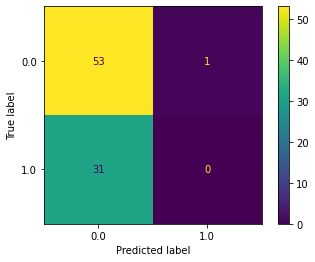

In [47]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Decisions Trees (depth 6):

Precision: 0.9523809523809523
Recall: 0.16260162601626016
F1: 0.2777777777777778


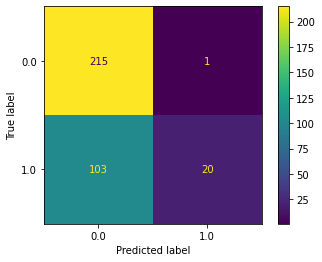

In [49]:
dtm = DecisionTreeClassifier(max_depth= 6)
dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


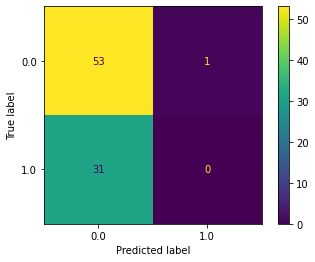

In [50]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Decisions Trees (depth 9):

Precision: 0.8076923076923077
Recall: 0.34146341463414637
F1: 0.48


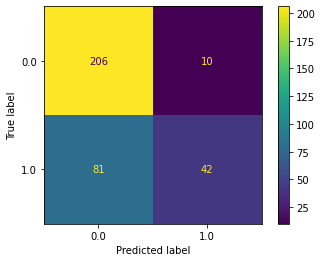

In [59]:
dtm = DecisionTreeClassifier(max_depth= 9)
dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.46153846153846156
Recall: 0.1935483870967742
F1: 0.2727272727272727


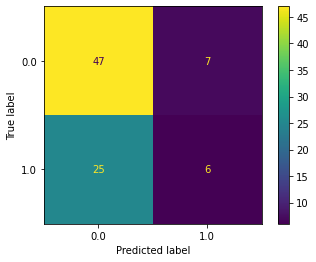

In [60]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 3, estimator 100):

Precision: 1.0
Recall: 0.024390243902439025
F1: 0.047619047619047616


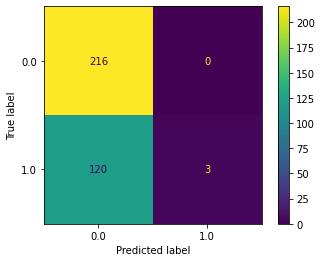

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth= 3, n_estimators= 100)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


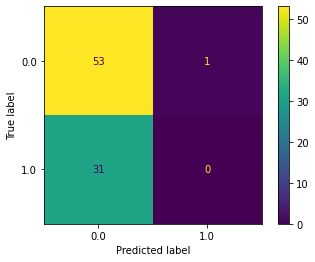

In [67]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 3, estimator 200):

#### Random Forest (depth 3, estimator 300):

#### Random Forest (depth 6, estimator 100):

#### Random Forest (depth 6, estimator 200):

#### Random Forest (depth 6, estimator 300):

#### Random Forest (depth 9, estimator 100):

#### Random Forest (depth 9, estimator 200):

#### Random Forest (depth 9, estimator 300):

#### Support Vector Machines (kernel: poly, degree: 2, gamma: scale):

Precision: 1.0
Recall: 0.5121951219512195
F1: 0.6774193548387097


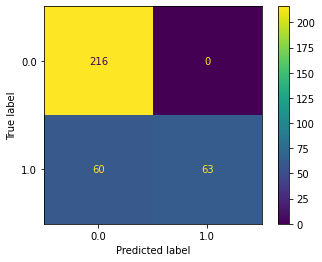

In [71]:
from sklearn.svm import SVC

svc= SVC(kernel= 'poly', degree= 2, gamma= 'scale')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


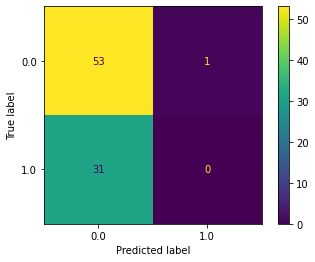

In [72]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: rbf, degree: 2, gamma: scale):

#### Support Vector Machines (kernel: poly, degree: 3, gamma: auto):

#### Support Vector Machines (kernel: rbf, degree: 3, gamma: scale):

#### Support Vector Machines (kernel: poly, degree: 2, gamma: auto):

#### Support Vector Machines (kernel: rbf, degree: 4, gamma: auto):

#### K-Nearest Neighborhood (neighborhoods: 3):

Precision: 0.6583850931677019
Recall: 0.8617886178861789
F1: 0.7464788732394366


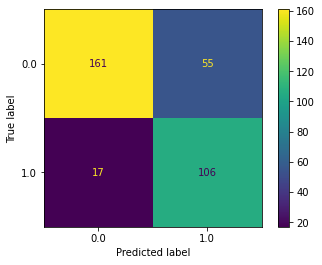

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knc= KNeighborsClassifier(n_neighbors= 3)
knc.fit(xTrainBow, yTrain)
y_train_bow_predict = knc.predict(xTrainBow)
y_test_bow_predict = knc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.43137254901960786
Recall: 0.7096774193548387
F1: 0.5365853658536586


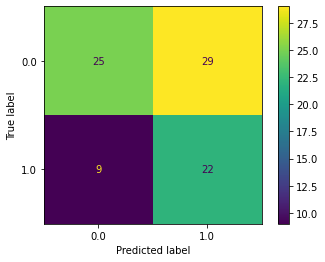

In [75]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### K-Nearest Neighborhood (neighborhoods: 5):

#### K-Nearest Neighborhood (neighborhoods: 7):

#### Multinomial Naive-Bayes:

Precision: 1.0
Recall: 0.9512195121951219
F1: 0.975


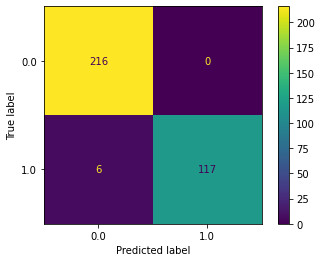

In [77]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(xTrainBow, yTrain)
y_train_bow_predict = mnb.predict(xTrainBow)
y_test_bow_predict = mnb.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.7272727272727273
Recall: 0.25806451612903225
F1: 0.38095238095238093


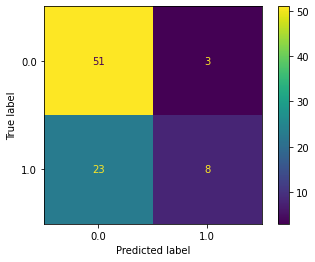

In [78]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100,)):

Precision: 1.0
Recall: 1.0
F1: 1.0


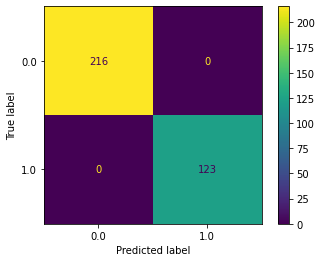

In [79]:
from sklearn.neural_network import MLPClassifier

mlpc= MLPClassifier(hidden_layer_sizes= (100,))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.625
Recall: 0.4838709677419355
F1: 0.5454545454545454


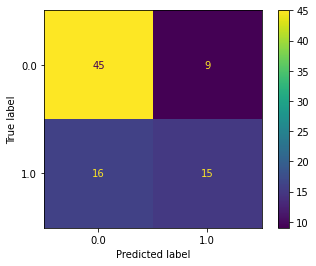

In [80]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100,100)):

Precision: 1.0
Recall: 1.0
F1: 1.0


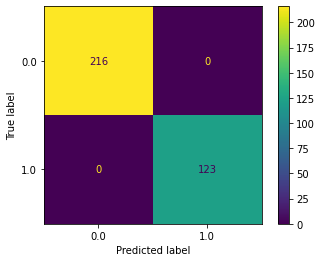

In [81]:
from sklearn.neural_network import MLPClassifier

mlpc= MLPClassifier(hidden_layer_sizes= (100,100))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5
Recall: 0.4838709677419355
F1: 0.4918032786885246


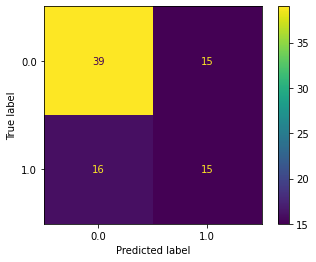

In [82]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100, 100, 100)):

#### Neural Networks (layer sizes: (200,)):

#### Neural Networks (layer sizes: (200, 200)):

#### Neural Networks (layer sizes: (200,200, 200)):

## Grid search for look the best hyper-parameters of models:

In [89]:
from sklearn.model_selection import GridSearchCV

dtc= DecisionTreeClassifier()
clf= GridSearchCV(dtc, {'max_depth':[3,6,9]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(max_depth=3)
{'max_depth': 3}
